In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict 
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [20]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26
})

In [21]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(416,)

In [22]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(416, 50, 50)

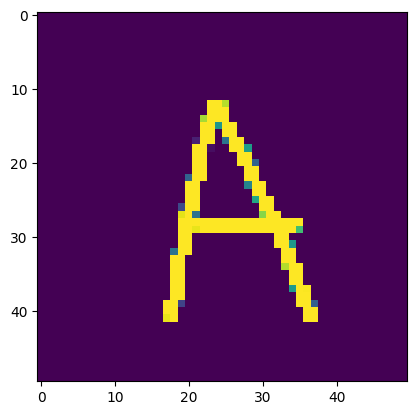

In [23]:
plt.figure()
plt.imshow(imgs[26])
plt.grid(False)
plt.show()

In [24]:
imgs = np.expand_dims(imgs, -1)

In [25]:
labels,imgs  = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [26]:
labels_train.shape

(312,)

In [27]:
imgs_train.shape

(312, 50, 50, 1)

In [28]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape =(50,50,1)),
    layers.Conv2D(32, kernel_size = 3, activation = 'relu'), 
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0,2),
    layers.Conv2D(64, kernel_size = 3, activation = 'relu'), 
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0,2),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation = 'softmax')
                
])

In [29]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [30]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test,labels_test),
          callbacks=[early_stopping])

          

Epoch 1/20
20/20 [==============================] - 1s 25ms/step - loss: 3.0043 - accuracy: 0.1603 - val_loss: 2.2482 - val_accuracy: 0.4519
Epoch 2/20
20/20 [==============================] - 0s 17ms/step - loss: 1.1778 - accuracy: 0.6923 - val_loss: 1.7283 - val_accuracy: 0.6058
Epoch 3/20
20/20 [==============================] - 0s 16ms/step - loss: 0.4650 - accuracy: 0.8590 - val_loss: 1.2531 - val_accuracy: 0.7019
Epoch 4/20
20/20 [==============================] - 0s 16ms/step - loss: 0.1928 - accuracy: 0.9519 - val_loss: 1.3201 - val_accuracy: 0.7212
Epoch 5/20
20/20 [==============================] - 0s 16ms/step - loss: 0.0771 - accuracy: 0.9808 - val_loss: 1.4976 - val_accuracy: 0.7308
Epoch 6/20
20/20 [==============================] - 0s 16ms/step - loss: 0.0302 - accuracy: 0.9936 - val_loss: 1.5862 - val_accuracy: 0.7115
Epoch 7/20
20/20 [==============================] - 0s 16ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.6447 - val_accuracy: 0.6923


In [33]:
labels_pred = np.argmax(model.predict(imgs_test),axis=-1)

4/4 [==============================] - 0s 7ms/step


In [34]:
cm=confusion_matrix(labels_test, labels_pred, labels = list(ENCODER.inverse.keys()))

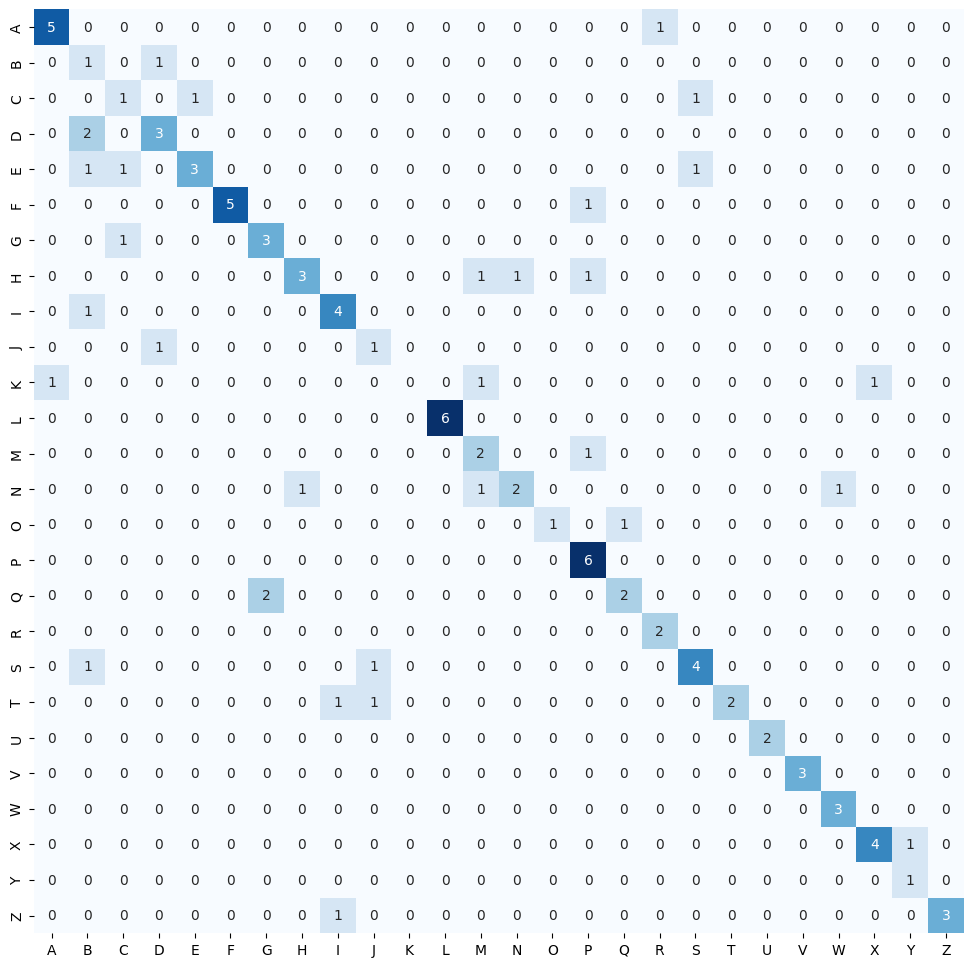

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues",xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [36]:
model.save('../letter.model')

INFO:tensorflow:Assets written to: ../letter.model\assets


INFO:tensorflow:Assets written to: ../letter.model\assets
